In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

In [2]:
trainDF = pd.read_csv('data/Train_psolI3n.csv')
testDF = pd.read_csv('data/Test_09JmpYa.csv')

In [3]:
#Check the percentage of email status
trainDF['Email_Status'].value_counts() /trainDF['Email_Status'].size

0    0.803783
1    0.161500
2    0.034717
Name: Email_Status, dtype: float64

In [4]:
#Do univariant analysis
#How is email type related to email status
trainDF['Email_Type'].value_counts()

1    48866
2    19487
Name: Email_Type, dtype: int64

In [5]:
trainDF = trainDF.drop('Email_ID', axis=1)

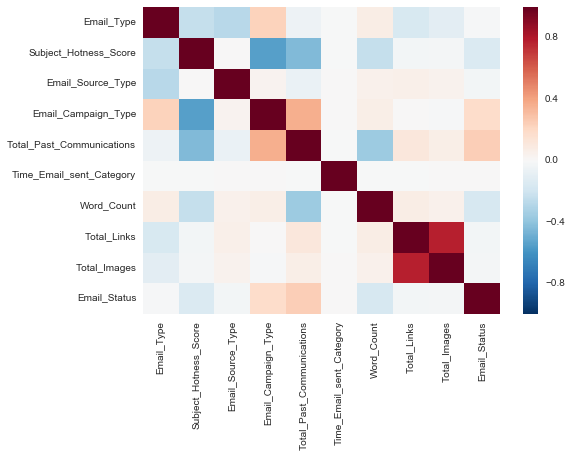

In [6]:
sns.heatmap(trainDF.corr())

In [7]:
trainDF.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

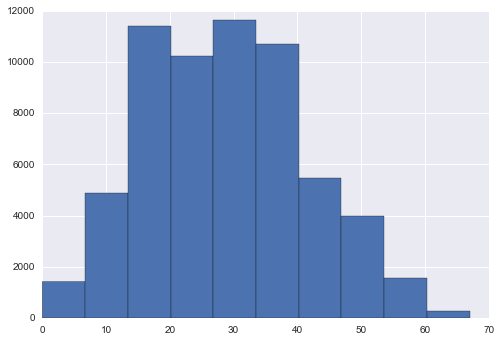

In [8]:
trainDF['Total_Past_Communications'].hist()

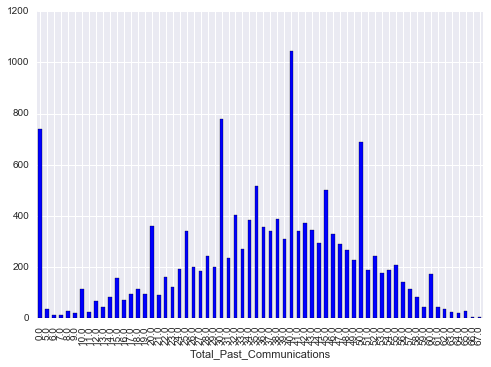

In [9]:
trainDF.groupby('Total_Past_Communications').Email_Status.sum().plot(kind='bar')

In [10]:
trainDF.dtypes

Email_Type                     int64
Subject_Hotness_Score        float64
Email_Source_Type              int64
Customer_Location             object
Email_Campaign_Type            int64
Total_Past_Communications    float64
Time_Email_sent_Category       int64
Word_Count                     int64
Total_Links                  float64
Total_Images                 float64
Email_Status                   int64
dtype: object

In [20]:
trainDF['Email_Type'].value_counts(dropna=False) / trainDF.shape[0]

1    0.714906
2    0.285094
Name: Email_Type, dtype: float64

In [36]:
clause = (trainDF['Subject_Hotness_Score'] > 4.0)

In [37]:
trainDF['Email_Status'][clause].value_counts() / trainDF[clause].shape[0]

0    0.719128
1    0.276029
2    0.004843
Name: Email_Status, dtype: float64

In [38]:
trainDF['Email_Source_Type'].value_counts(dropna=False) / trainDF.shape[0]

1    0.543487
2    0.456513
Name: Email_Source_Type, dtype: float64

In [39]:
trainDF['Customer_Location'].value_counts(dropna=False) / trainDF.shape[0]

G      0.339020
NaN    0.169634
E      0.149123
D      0.108349
C      0.084239
F      0.064855
B      0.063509
A      0.021272
Name: Customer_Location, dtype: float64

In [40]:
trainDF['Email_Campaign_Type'].value_counts(dropna=False) / trainDF.shape[0]

2    0.706231
3    0.283001
1    0.010768
Name: Email_Campaign_Type, dtype: float64

In [46]:
trainDF['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [66]:
clause = ((trainDF['Total_Past_Communications']>21) & (trainDF['Total_Past_Communications'] <31) )

In [90]:
trainDF['Email_Status'][clause].value_counts(dropna=False) / trainDF[clause].shape[0]

0    0.867727
1    0.115623
2    0.016649
Name: Email_Status, dtype: float64

In [75]:
dummies = pd.get_dummies(trainDF['Email_Status'], prefix='status')

In [76]:
trainDF = pd.concat([trainDF,dummies],axis=1)

In [77]:
trainDF.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status', 'status_0', 'status_1', 'status_2'],
      dtype='object')

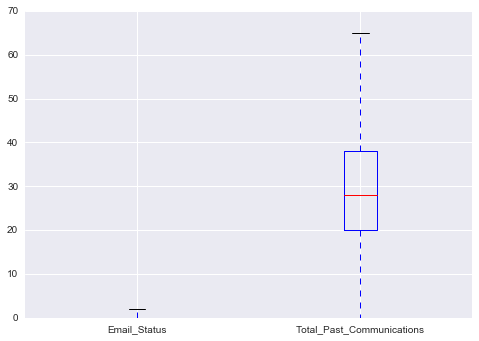

In [105]:
trainDF[['Email_Status','Total_Past_Communications']].plot(kind='box')

In [88]:
trainDF['Total_Past_Communications'].median()

28.0

In [92]:
trainDF['Time_Email_sent_Category'].value_counts(dropna=False) / trainDF.shape[0]

2    0.601715
1    0.199494
3    0.198792
Name: Time_Email_sent_Category, dtype: float64

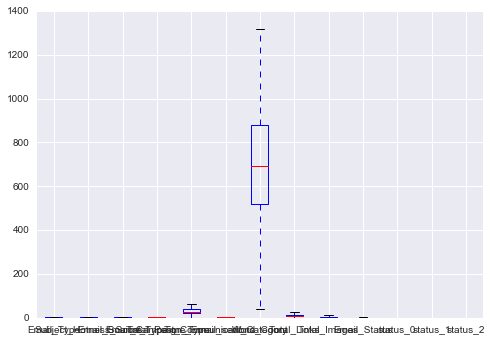

In [95]:
trainDF.plot(kind='box',x='')

In [131]:
trainDF['Email_Status'][trainDF['Customer_Location'].isnull()].value_counts() / trainDF[trainDF['Customer_Location'].isnull()].shape[0]

0    0.806468
1    0.159379
2    0.034153
Name: Email_Status, dtype: float64

In [132]:
trainDF['Email_Status'].value_counts() / trainDF.shape[0]

0    0.803783
1    0.161500
2    0.034717
Name: Email_Status, dtype: float64

In [135]:
trainDF['Word_Count'].isnull().sum()

0

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission['Email_ID'] = testDF['Email_ID']
submission['Email_Status'] = 0

In [ ]:
submission.to_csv('sub1.csv', index=False)